In [267]:
import ROOT ,os, sys , math
from ROOT import  TPlots
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
import numpy as np , pandas as pd
from root_numpy import root2array, tree2array , hist2array

In [268]:
run = 80

In [269]:
FileName = "Ana_GSIM_run%04d_eep"%run
Path = "/Users/erezcohen/Desktop/DataMining/AnaFiles"
ana = TPlots( Path + "/" + FileName + ".root" , "anaTree" )
T = tree2array(ana.GetTree(),branches=['Np_g','Np','protons[0].Theta()','protons[0].P()','protons_g[0].Theta()','protons_g[0].P()'])

In [325]:
Np = T['Np']
Np_g = T['Np_g']
pMag_acc, pTheta_acc = T['protons_g[0].P()'][T['Np']==1]  , T['protons_g[0].Theta()'][T['Np']==1]
pMag_acc, pTheta_acc = pMag_acc.astype('float') ,  pTheta_acc.astype('float')
pMag_gen, pTheta_gen = T['protons_g[0].P()'][T['Np_g']==1], T['protons_g[0].Theta()'][T['Np_g']==1]
pMag_gen, pTheta_gen = pMag_gen.astype('float'),  pTheta_gen.astype('float')
p_accepted = np.ones(len(T))*[1 if Np[i]==1 else 0 for i in range(len(T))]
data = {'pMag_gen':pMag_gen, 'pTheta_gen':pTheta_gen,'p_accepted':p_accepted}
df = pd.DataFrame(data,columns = ['pMag_gen', 'pTheta_gen', 'p_accepted'])

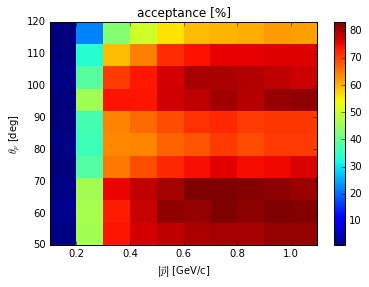

In [366]:
fig= plt.figure()
ax = plt.subplot(1,1,1)
hGenerated,xedges,yedges=np.histogram2d( df.pMag_gen , (180./3.1415)*df.pTheta_gen, bins=bins )
hAccepted,xedges,yedges=np.histogram2d( df.pMag_gen , (180./3.1415)*df.pTheta_gen, weights=df.p_accepted, bins=bins )
hAcceptance = 100*hAccepted/hGenerated
extent = [xedges.min(),xedges.max(),yedges.min(),yedges.max()]
im = ax.imshow(np.ma.masked_where(hAcceptance==0,hAcceptance).T
               , interpolation='none', origin='lower'
               , extent=extent, aspect='auto')
divider = make_axes_locatable(ax)
cbar = fig.colorbar(im)
plt.title('acceptance [%]')
plt.xlabel(r'|$\vec{p}$| [GeV/c]')
plt.ylabel(r'$\theta_{p}$ [deg]')

In [367]:
df.to_csv('accpetance_p_theta.csv')
print "df:",df;

df:         pMag_gen  pTheta_gen  p_accepted
0       0.124727    1.604573         0.0
1       0.365991    1.725986         0.0
2       0.849792    2.094362         1.0
3       0.722777    1.879005         0.0
4       0.839077    0.941699         1.0
5       0.876198    0.917625         1.0
6       0.181843    1.294262         0.0
7       0.501177    1.058950         1.0
8       0.140778    1.864351         0.0
9       0.932362    1.575392         1.0
10      1.096930    1.164318         0.0
11      0.946860    1.962517         1.0
12      0.806421    0.913425         1.0
13      0.121545    1.494499         0.0
14      0.907284    1.866619         1.0
15      0.880848    1.529368         1.0
16      0.525855    1.726971         1.0
17      0.654841    2.027950         0.0
18      0.748339    1.334919         1.0
19      0.985354    1.062616         1.0
20      0.530301    2.047563         1.0
21      0.567188    1.409409         0.0
22      0.378510    1.211325         1.0
23      1.06